Genome-wide DNA methylation measurements in prostate tissues uncovers novel prostate cancer diagnostic biomarkers and transcription factor binding patterns
https://bmccancer.biomedcentral.com/articles/10.1186/s12885-017-3252-2#Sec2

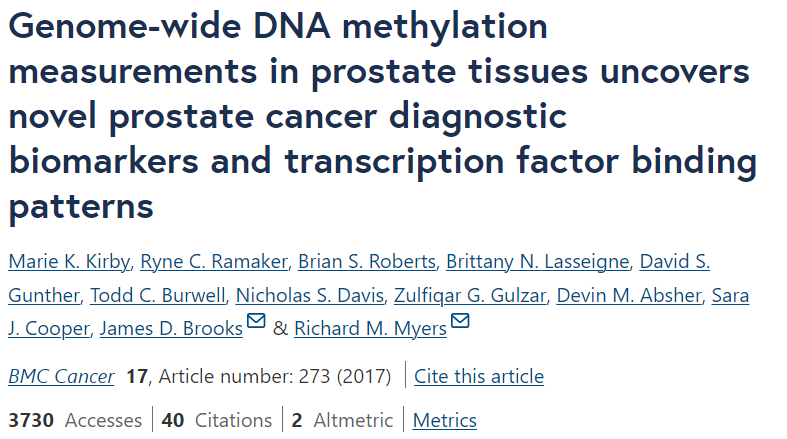

### 准备数据

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
import numpy as np
import pandas as pd

#读入数据

dataraw=pd.read_table("D:/000Archive/ResearchProjects/DNAm_predictor/prostate/GSE76938_matrix_processed.txt", header=0, delimiter='\t')
display(dataraw.head())
selected_columns = [0] + list(range(1, dataraw.shape[1], 2))
data_sel = dataraw.iloc[:, selected_columns]

C:\Users\LSY\AppData\Local\Temp\ipykernel_24056\3577214809.py:15: DtypeWarning: Columns (1,3,5,7,9,11,13,15,17,19,21,23,27,29,33,35,37,39,41,43,47,51,55,57,59,61,63,65,67,69,71,75,77,79,81,83,85,87,89,91,93,95,97,99,103,105,109,113,115,117,119,121,125,127,129,131,133,135,137,141,143,145,147,149,151,153,155,157,159,161,163,165,167,171,175,177,179,183,185,187,189,193,195,197,199,201,203,207,209,211,213,215,219,221,223,225,227,229,231,233,235,237,239,241,243,245,247,249,251,253,255,257,259,261,263,265,267,269,271) have mixed types. Specify dtype option on import or set low_memory=False.
  dataraw=pd.read_table("D:/000Archive/ResearchProjects/DNAm_predictor/prostate/GSE76938_matrix_processed.txt", header=0, delimiter='\t')


,TargetID,PC19T.AVG_Beta,PC19T.Detection Pval,PC47T.AVG_Beta,PC47T.Detection Pval,PC97T.AVG_Beta,PC97T.Detection Pval,PC228T.AVG_Beta,PC228T.Detection Pval,PC252T.AVG_Beta,...,PC99N.AVG_Beta,PC99N.Detection Pval,PC157N.AVG_Beta,PC157N.Detection Pval,PC237N.AVG_Beta,PC237N.Detection Pval,PC393N.AVG_Beta,PC393N.Detection Pval,PC159N.AVG_Beta,PC159N.Detection Pval
0,cg00000029,0.1603076,0.0,0.1379451,0.0,0.2535613,0.0,0.2326612,0.0,0.2566839,...,0.1538042,0.0,0.1784815,0.0,0.1557582,0.0,0.17383,0.0,0.2877239,0.0
1,cg00000108,0.9286215,0.0,0.9135115,0.0,0.9487144,0.0,0.9308022,0.0,0.9300234,...,0.9493172,0.0,0.9439861,0.0,0.9182795,0.0,0.931991,0.0,0.940213,0.0
2,cg00000109,0.9247897,0.0,0.8738152,0.0,0.9001468,0.0,0.9068819,0.0,0.8547836,...,0.8619574,0.0,0.886274,0.0,0.9028305,0.0,0.827466,0.0,0.8190646,0.0
3,cg00000165,0.7249455,0.0,0.1416894,0.0,0.4010621,0.0,0.5219899,0.0,0.1937905,...,0.2073547,0.0,0.1463049,0.0,0.4643666,0.0,0.139882,0.0,0.1690121,0.0
4,cg00000236,0.851113,0.0,0.8738322,0.0,0.8419719,0.0,0.8872688,0.0,0.8312222,...,0.8106807,0.0,0.8160777,0.0,0.8281421,0.0,0.812578,0.0,0.7364787,0.0


In [2]:
#转置
display(data_sel.head())
display(data_sel.tail())
data_sel_transposed = data_sel.transpose()
display(data_sel_transposed.head())

,TargetID,PC19T.AVG_Beta,PC47T.AVG_Beta,PC97T.AVG_Beta,PC228T.AVG_Beta,PC252T.AVG_Beta,PC265T.AVG_Beta,PC366T.AVG_Beta,PC370T.AVG_Beta,PC398T.AVG_Beta,...,PC594N.AVG_Beta,PC185N.AVG_Beta,PC274N.AVG_Beta,PC370N.AVG_Beta,PC84N.AVG_Beta,PC99N.AVG_Beta,PC157N.AVG_Beta,PC237N.AVG_Beta,PC393N.AVG_Beta,PC159N.AVG_Beta
0,cg00000029,0.1603076,0.1379451,0.2535613,0.2326612,0.2566839,0.1787622,0.2580676,0.174336,0.1755055,...,0.1567222,0.159333,0.2877403,0.31838,0.139925,0.1538042,0.1784815,0.1557582,0.17383,0.2877239
1,cg00000108,0.9286215,0.9135115,0.9487144,0.9308022,0.9300234,0.9347536,0.9469227,0.9029321,0.9110765,...,0.9233306,0.9442511,0.9367408,0.935132,0.938591,0.9493172,0.9439861,0.9182795,0.931991,0.940213
2,cg00000109,0.9247897,0.8738152,0.9001468,0.9068819,0.8547836,0.9193342,0.9221367,0.886839,0.8226436,...,0.8609248,0.8771226,0.8505128,0.853877,0.905736,0.8619574,0.886274,0.9028305,0.827466,0.8190646
3,cg00000165,0.7249455,0.1416894,0.4010621,0.5219899,0.1937905,0.3761031,0.2605621,0.5530614,0.6227742,...,0.1430327,0.1544278,0.1669437,0.163887,0.195309,0.2073547,0.1463049,0.4643666,0.139882,0.1690121
4,cg00000236,0.851113,0.8738322,0.8419719,0.8872688,0.8312222,0.8842433,0.8641561,0.848248,0.79046,...,0.8188799,0.8302954,0.8414315,0.855501,0.839156,0.8106807,0.8160777,0.8281421,0.812578,0.7364787


,TargetID,PC19T.AVG_Beta,PC47T.AVG_Beta,PC97T.AVG_Beta,PC228T.AVG_Beta,PC252T.AVG_Beta,PC265T.AVG_Beta,PC366T.AVG_Beta,PC370T.AVG_Beta,PC398T.AVG_Beta,...,PC594N.AVG_Beta,PC185N.AVG_Beta,PC274N.AVG_Beta,PC370N.AVG_Beta,PC84N.AVG_Beta,PC99N.AVG_Beta,PC157N.AVG_Beta,PC237N.AVG_Beta,PC393N.AVG_Beta,PC159N.AVG_Beta
485572,rs9363764,0.595975,0.07768,0.596074,0.6180958,0.182691,0.074221,0.566576,0.53386,0.451907,...,0.543464,0.580906,0.604778,0.571206,0.95223,0.524189,0.58289,0.957796,0.55695,0.953603
485573,rs939290,0.040075,0.598,0.983632,0.960065,0.585714,0.976067,0.723859,0.051806,0.972107,...,0.97059,0.037345,0.581942,0.028643,0.498916,0.974025,0.553789,0.9758418,0.541511,0.614965
485574,rs951295,0.055531,0.055655,0.48074,0.8552138,0.197584,0.938831,0.447622,0.919176,0.94104,...,0.945977,0.949683,0.522164,0.947368,0.517345,0.949056,0.923141,0.5287395,0.52371,0.180862
485575,rs966367,0.576542,0.581732,0.565675,0.591266,0.89964,0.963498,0.426994,0.534192,0.386229,...,0.036843,0.960032,0.574127,0.56379,0.948033,0.02241,0.540325,0.9754558,0.541736,0.599159
485576,rs9839873,0.967179,0.96012,0.960852,0.9461213,0.714175,0.650699,0.797424,0.964678,0.505719,...,0.637267,0.643122,0.973702,0.962419,0.944129,0.960462,0.959868,0.9712516,0.943558,0.703438


,0,1,2,3,4,5,6,7,8,9,...,485567,485568,485569,485570,485571,485572,485573,485574,485575,485576
TargetID,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,...,rs7746156,rs798149,rs845016,rs877309,rs9292570,rs9363764,rs939290,rs951295,rs966367,rs9839873
PC19T.AVG_Beta,0.1603076,0.9286215,0.9247897,0.7249455,0.851113,0.7380475,0.6843916,0.6360686,0.1840406,0.01233009,...,0.524188,0.977371,0.51274,0.571216,0.492681,0.595975,0.040075,0.055531,0.576542,0.967179
PC47T.AVG_Beta,0.1379451,0.9135115,0.8738152,0.1416894,0.8738322,0.7314496,0.6597716,0.4476129,0.1364286,0.006812365,...,0.521923,0.977202,0.47489,0.592991,0.515219,0.07768,0.598,0.055655,0.581732,0.96012
PC97T.AVG_Beta,0.2535613,0.9487144,0.9001468,0.4010621,0.8419719,0.6988511,0.7069154,0.4966435,0.2366548,0.0162284,...,0.039174,0.975483,0.049727,0.594161,0.494955,0.596074,0.983632,0.48074,0.565675,0.960852
PC228T.AVG_Beta,0.2326612,0.9308022,0.9068819,0.5219899,0.8872688,0.723631,0.7360038,0.5956946,0.2564738,0.00,...,0.9261144,0.973482,0.9410781,0.6132417,0.9190211,0.6180958,0.960065,0.8552138,0.591266,0.9461213


In [3]:
# 列名整理
data_sel_transposed.columns = data_sel_transposed.iloc[0]
data_sel_transposed= data_sel_transposed[1:]
display(data_sel_transposed)

TargetID,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,...,rs7746156,rs798149,rs845016,rs877309,rs9292570,rs9363764,rs939290,rs951295,rs966367,rs9839873
PC19T.AVG_Beta,0.1603076,0.9286215,0.9247897,0.7249455,0.851113,0.7380475,0.6843916,0.6360686,0.1840406,0.01233009,...,0.524188,0.977371,0.51274,0.571216,0.492681,0.595975,0.040075,0.055531,0.576542,0.967179
PC47T.AVG_Beta,0.1379451,0.9135115,0.8738152,0.1416894,0.8738322,0.7314496,0.6597716,0.4476129,0.1364286,0.006812365,...,0.521923,0.977202,0.47489,0.592991,0.515219,0.07768,0.598,0.055655,0.581732,0.96012
PC97T.AVG_Beta,0.2535613,0.9487144,0.9001468,0.4010621,0.8419719,0.6988511,0.7069154,0.4966435,0.2366548,0.0162284,...,0.039174,0.975483,0.049727,0.594161,0.494955,0.596074,0.983632,0.48074,0.565675,0.960852
PC228T.AVG_Beta,0.2326612,0.9308022,0.9068819,0.5219899,0.8872688,0.723631,0.7360038,0.5956946,0.2564738,0.00,...,0.9261144,0.973482,0.9410781,0.6132417,0.9190211,0.6180958,0.960065,0.8552138,0.591266,0.9461213
PC252T.AVG_Beta,0.2566839,0.9300234,0.8547836,0.1937905,0.8312222,0.7108471,0.5997744,0.4625632,0.1980833,0.01250642,...,0.490492,0.838412,0.876141,0.541094,0.161322,0.182691,0.585714,0.197584,0.89964,0.714175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PC99N.AVG_Beta,0.1538042,0.9493172,0.8619574,0.2073547,0.8106807,0.8265045,0.5867794,0.5833581,0.1437315,0.0130707,...,0.472365,0.969959,0.437544,0.537509,0.504551,0.524189,0.974025,0.949056,0.02241,0.960462
PC157N.AVG_Beta,0.1784815,0.9439861,0.886274,0.1463049,0.8160777,0.672231,0.5841427,0.5434021,0.1761186,0.004126256,...,0.954284,0.034896,0.472315,0.565031,0.936092,0.58289,0.553789,0.923141,0.540325,0.959868
PC237N.AVG_Beta,0.1557582,0.9182795,0.9028305,0.4643666,0.8281421,0.7806548,0.5844564,0.6705577,0.15365,0.01165852,...,0.9635677,0.9573867,0.03559797,0.9694884,0.0432476,0.957796,0.9758418,0.5287395,0.9754558,0.9712516
PC393N.AVG_Beta,0.17383,0.931991,0.827466,0.139882,0.812578,0.650313,0.559169,0.387429,0.1314,0.006881,...,0.040853,0.019975,0.948212,0.541083,0.499222,0.55695,0.541511,0.52371,0.541736,0.943558


In [4]:
#这篇文章除了用甲基化数据也用了RNA-seq SNP数据 也就是cg开头的特征和rs开头的特征 删掉rs
#Transcripts from the X and Y-chromosomes were removed prior to differential expression analysis.
data_sel_transposed = data_sel_transposed.filter(regex='^(?!rs)')
data_sel_transposed = data_sel_transposed.filter(regex='^(?!ch)')
display(data_sel_transposed)

TargetID,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,...,cg27665767,cg27665769,cg27665808,cg27665823,cg27665829,cg27665860,cg27665925,cg27665985,cg27666046,cg27666123
PC19T.AVG_Beta,0.1603076,0.9286215,0.9247897,0.7249455,0.851113,0.7380475,0.6843916,0.6360686,0.1840406,0.01233009,...,0.7241746,0.536735,0.2099105,0.6316816,0.8084088,0.7141357,0.01455773,0.2341927,0.442225,0.5296543
PC47T.AVG_Beta,0.1379451,0.9135115,0.8738152,0.1416894,0.8738322,0.7314496,0.6597716,0.4476129,0.1364286,0.006812365,...,0.37234,0.4758411,0.233819,0.6526488,0.9113252,0.816134,0.0110682,0.3189958,0.4630519,0.5517523
PC97T.AVG_Beta,0.2535613,0.9487144,0.9001468,0.4010621,0.8419719,0.6988511,0.7069154,0.4966435,0.2366548,0.0162284,...,0.4956534,0.5182402,0.4957646,0.6730427,0.9539701,0.8254169,0.003007333,0.3901412,0.5447106,0.6953638
PC228T.AVG_Beta,0.2326612,0.9308022,0.9068819,0.5219899,0.8872688,0.723631,0.7360038,0.5956946,0.2564738,0.00,...,0.610534,0.540931,0.253683,0.623682,0.938821,0.86818,0.01553,0.336669,0.518268,0.64944
PC252T.AVG_Beta,0.2566839,0.9300234,0.8547836,0.1937905,0.8312222,0.7108471,0.5997744,0.4625632,0.1980833,0.01250642,...,0.5784042,0.4861953,0.3191873,0.6133365,0.8835766,0.767247,0.005941394,0.2877124,0.4137417,0.6923921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PC99N.AVG_Beta,0.1538042,0.9493172,0.8619574,0.2073547,0.8106807,0.8265045,0.5867794,0.5833581,0.1437315,0.0130707,...,0.453662,0.5150167,0.3091358,0.8209787,0.893145,0.7900308,0.002319588,0.2850561,0.6399587,0.4619189
PC157N.AVG_Beta,0.1784815,0.9439861,0.886274,0.1463049,0.8160777,0.672231,0.5841427,0.5434021,0.1761186,0.004126256,...,0.5320339,0.4980388,0.2706951,0.8225583,0.9101089,0.7920407,0.008201035,0.2585049,0.4698215,0.573144
PC237N.AVG_Beta,0.1557582,0.9182795,0.9028305,0.4643666,0.8281421,0.7806548,0.5844564,0.6705577,0.15365,0.01165852,...,0.756378,0.4971655,0.2431508,0.8340267,0.7973722,0.7802063,0.005090236,0.1447335,0.4043615,0.490602
PC393N.AVG_Beta,0.17383,0.931991,0.827466,0.139882,0.812578,0.650313,0.559169,0.387429,0.1314,0.006881,...,0.441993,0.4678056,0.2598638,0.7876256,0.918804,0.791373,0.01266158,0.2749743,0.488308,0.5523025


“ Infinium I and II assays showed two distinct bimodal b-value distributions, so we developed a regression method to convert the type I and type II assays to a single bimodal b-distribution"
我下载的数据里没有Infinium I and II的标签区分，暂时也没找到，所以跳过了这一步

In [5]:
data_sel_transposed = data_sel_transposed.apply(pd.to_numeric, errors='coerce')

In [6]:
m=data_sel_transposed.iloc[0,0]
display(m)

type(m)

0.1603076

numpy.float64

In [7]:

has_nan = data_sel_transposed.isna().any().any()
print("Any NaN values present:", has_nan)

if has_nan:
    # 将所有NaN值替换为0
    data_sel_transposed.fillna(0, inplace=True)

    # 再次检查是否还有NaN值
    has_nan_after_fillna = data_sel_transposed.isna().any().any()
    if not has_nan_after_fillna:
        print("All NaN values replaced with 0.")
    else:
        print("Some NaN values still present after attempting to replace with 0.")
else:
    print("No NaN values found.")

Any NaN values present: True
All NaN values replaced with 0.


In [8]:
display(data_sel_transposed)

TargetID,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,...,cg27665767,cg27665769,cg27665808,cg27665823,cg27665829,cg27665860,cg27665925,cg27665985,cg27666046,cg27666123
PC19T.AVG_Beta,0.160308,0.928621,0.924790,0.724946,0.851113,0.738047,0.684392,0.636069,0.184041,0.012330,...,0.724175,0.536735,0.209910,0.631682,0.808409,0.714136,0.014558,0.234193,0.442225,0.529654
PC47T.AVG_Beta,0.137945,0.913512,0.873815,0.141689,0.873832,0.731450,0.659772,0.447613,0.136429,0.006812,...,0.372340,0.475841,0.233819,0.652649,0.911325,0.816134,0.011068,0.318996,0.463052,0.551752
PC97T.AVG_Beta,0.253561,0.948714,0.900147,0.401062,0.841972,0.698851,0.706915,0.496644,0.236655,0.016228,...,0.495653,0.518240,0.495765,0.673043,0.953970,0.825417,0.003007,0.390141,0.544711,0.695364
PC228T.AVG_Beta,0.232661,0.930802,0.906882,0.521990,0.887269,0.723631,0.736004,0.595695,0.256474,0.000000,...,0.610534,0.540931,0.253683,0.623682,0.938821,0.868180,0.015530,0.336669,0.518268,0.649440
PC252T.AVG_Beta,0.256684,0.930023,0.854784,0.193791,0.831222,0.710847,0.599774,0.462563,0.198083,0.012506,...,0.578404,0.486195,0.319187,0.613336,0.883577,0.767247,0.005941,0.287712,0.413742,0.692392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PC99N.AVG_Beta,0.153804,0.949317,0.861957,0.207355,0.810681,0.826504,0.586779,0.583358,0.143732,0.013071,...,0.453662,0.515017,0.309136,0.820979,0.893145,0.790031,0.002320,0.285056,0.639959,0.461919
PC157N.AVG_Beta,0.178481,0.943986,0.886274,0.146305,0.816078,0.672231,0.584143,0.543402,0.176119,0.004126,...,0.532034,0.498039,0.270695,0.822558,0.910109,0.792041,0.008201,0.258505,0.469822,0.573144
PC237N.AVG_Beta,0.155758,0.918280,0.902830,0.464367,0.828142,0.780655,0.584456,0.670558,0.153650,0.011659,...,0.756378,0.497165,0.243151,0.834027,0.797372,0.780206,0.005090,0.144733,0.404361,0.490602
PC393N.AVG_Beta,0.173830,0.931991,0.827466,0.139882,0.812578,0.650313,0.559169,0.387429,0.131400,0.006881,...,0.441993,0.467806,0.259864,0.787626,0.918804,0.791373,0.012662,0.274974,0.488308,0.552303


In [9]:
# CpGs with a standard deviation of less than 1% across samples were removed prior to analysis.
column_std = data_sel_transposed.std()
display(column_std)
std_percentile = column_std.quantile(0.01)
filtered_data = data_sel_transposed.loc[:, column_std >= std_percentile]


TargetID
cg00000029    0.051418
cg00000108    0.017250
cg00000109    0.034159
cg00000165    0.195787
cg00000236    0.033514
                ...   
cg27665860    0.044218
cg27665925    0.004888
cg27665985    0.049851
cg27666046    0.078382
cg27666123    0.082950
Length: 482421, dtype: float64

In [10]:
display(filtered_data)

TargetID,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,...,cg27665767,cg27665769,cg27665808,cg27665823,cg27665829,cg27665860,cg27665925,cg27665985,cg27666046,cg27666123
PC19T.AVG_Beta,0.160308,0.928621,0.924790,0.724946,0.851113,0.738047,0.684392,0.636069,0.184041,0.012330,...,0.724175,0.536735,0.209910,0.631682,0.808409,0.714136,0.014558,0.234193,0.442225,0.529654
PC47T.AVG_Beta,0.137945,0.913512,0.873815,0.141689,0.873832,0.731450,0.659772,0.447613,0.136429,0.006812,...,0.372340,0.475841,0.233819,0.652649,0.911325,0.816134,0.011068,0.318996,0.463052,0.551752
PC97T.AVG_Beta,0.253561,0.948714,0.900147,0.401062,0.841972,0.698851,0.706915,0.496644,0.236655,0.016228,...,0.495653,0.518240,0.495765,0.673043,0.953970,0.825417,0.003007,0.390141,0.544711,0.695364
PC228T.AVG_Beta,0.232661,0.930802,0.906882,0.521990,0.887269,0.723631,0.736004,0.595695,0.256474,0.000000,...,0.610534,0.540931,0.253683,0.623682,0.938821,0.868180,0.015530,0.336669,0.518268,0.649440
PC252T.AVG_Beta,0.256684,0.930023,0.854784,0.193791,0.831222,0.710847,0.599774,0.462563,0.198083,0.012506,...,0.578404,0.486195,0.319187,0.613336,0.883577,0.767247,0.005941,0.287712,0.413742,0.692392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PC99N.AVG_Beta,0.153804,0.949317,0.861957,0.207355,0.810681,0.826504,0.586779,0.583358,0.143732,0.013071,...,0.453662,0.515017,0.309136,0.820979,0.893145,0.790031,0.002320,0.285056,0.639959,0.461919
PC157N.AVG_Beta,0.178481,0.943986,0.886274,0.146305,0.816078,0.672231,0.584143,0.543402,0.176119,0.004126,...,0.532034,0.498039,0.270695,0.822558,0.910109,0.792041,0.008201,0.258505,0.469822,0.573144
PC237N.AVG_Beta,0.155758,0.918280,0.902830,0.464367,0.828142,0.780655,0.584456,0.670558,0.153650,0.011659,...,0.756378,0.497165,0.243151,0.834027,0.797372,0.780206,0.005090,0.144733,0.404361,0.490602
PC393N.AVG_Beta,0.173830,0.931991,0.827466,0.139882,0.812578,0.650313,0.559169,0.387429,0.131400,0.006881,...,0.441993,0.467806,0.259864,0.787626,0.918804,0.791373,0.012662,0.274974,0.488308,0.552303


In [11]:
#目标状态reference
#1='cancer'0='benign'
referencedata = pd.DataFrame(index=data_sel_transposed.index)
referencedata = referencedata.rename_axis('TargetID')
referencedata['status'] = [1] * 73 + [0] * 63
display(referencedata)

,status
TargetID,
PC19T.AVG_Beta,1
PC47T.AVG_Beta,1
PC97T.AVG_Beta,1
PC228T.AVG_Beta,1
PC252T.AVG_Beta,1
...,...
PC99N.AVG_Beta,0
PC157N.AVG_Beta,0
PC237N.AVG_Beta,0


In [12]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data_sel_transposed, test_size=0.2, random_state=42)
train_data = pd.merge(train_data, referencedata, left_index=True, right_index=True, how='left')
test_data= pd.merge(test_data, referencedata, left_index=True, right_index=True, how='left')
display(train_data)
display(test_data)

,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,...,cg27665769,cg27665808,cg27665823,cg27665829,cg27665860,cg27665925,cg27665985,cg27666046,cg27666123,status
PC452T.AVG_Beta,0.313217,0.933770,0.861246,0.191365,0.836262,0.742294,0.654916,0.513385,0.247536,0.009249,...,0.512706,0.296339,0.622524,0.888657,0.805292,0.010671,0.280958,0.461927,0.701407,1
S07 9957.AVG_Beta,0.229929,0.956389,0.908317,0.435920,0.856409,0.780606,0.641811,0.489584,0.412496,0.013829,...,0.521365,0.391876,0.644860,0.873890,0.837251,0.016498,0.338565,0.502252,0.644323,1
PC370N.AVG_Beta,0.318380,0.935132,0.853877,0.163887,0.855501,0.757197,0.673557,0.458616,0.259531,0.019528,...,0.446411,0.368100,0.778725,0.940094,0.819516,0.011002,0.374099,0.535569,0.644700,0
PC477N.AVG_Beta,0.318765,0.952593,0.846115,0.226078,0.821307,0.802272,0.689396,0.498096,0.264077,0.019780,...,0.534115,0.343215,0.683484,0.924608,0.821566,0.011790,0.368147,0.416800,0.730734,0
PC343N.AVG_Beta,0.286232,0.957145,0.908454,0.227639,0.862565,0.779611,0.696241,0.506642,0.245609,0.007025,...,0.512606,0.260833,0.673271,0.947946,0.833105,0.014784,0.323652,0.555533,0.750361,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TB2682T.AVG_Beta,0.184788,0.921327,0.936534,0.835657,0.876590,0.745182,0.726232,0.666392,0.173377,0.009294,...,0.484989,0.466340,0.792959,0.818120,0.841229,0.003506,0.219612,0.167362,0.746257,1
PC634N.AVG_Beta,0.224359,0.943754,0.925781,0.156541,0.838507,0.723889,0.656848,0.378152,0.235502,0.011510,...,0.531946,0.288411,0.598437,0.897038,0.765694,0.010835,0.263942,0.508523,0.563748,0
PC636T.AVG_Beta,0.241851,0.953011,0.858478,0.531394,0.823293,0.746788,0.742804,0.569867,0.271548,0.016656,...,0.489070,0.410199,0.750759,0.906593,0.849965,0.006519,0.363568,0.444078,0.638571,1
PC636N.AVG_Beta,0.215607,0.915439,0.917293,0.154153,0.868537,0.697884,0.619889,0.456360,0.214197,0.014983,...,0.537015,0.221212,0.626392,0.901182,0.792646,0.016315,0.348210,0.429730,0.626492,0


,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,...,cg27665769,cg27665808,cg27665823,cg27665829,cg27665860,cg27665925,cg27665985,cg27666046,cg27666123,status
PC593N.AVG_Beta,0.284582,0.956863,0.845918,0.164026,0.840202,0.643894,0.633308,0.434074,0.213859,0.008952,...,0.493711,0.262715,0.658249,0.944263,0.791570,0.011840,0.294670,0.495647,0.647336,0
PC555T.AVG_Beta,0.143590,0.924483,0.907054,0.182408,0.819890,0.773103,0.632604,0.596750,0.164780,0.005450,...,0.497973,0.330141,0.725328,0.889879,0.813733,0.014060,0.207383,0.435304,0.457230,1
PC648T.AVG_Beta,0.231773,0.917946,0.922765,0.529509,0.845670,0.623800,0.782596,0.524702,0.304026,0.018148,...,0.519518,0.233465,0.617126,0.714129,0.802790,0.009681,0.349936,0.337304,0.770711,1
PC501T.AVG_Beta,0.219416,0.941383,0.882674,0.354270,0.900573,0.649660,0.724923,0.711385,0.179748,0.000000,...,0.451141,0.238536,0.664779,0.733677,0.694029,0.009436,0.275034,0.602650,0.359542,1
PC274N.AVG_Beta,0.287740,0.936741,0.850513,0.166944,0.841431,0.623951,0.636207,0.439604,0.262911,0.017350,...,0.466276,0.368958,0.739731,0.881274,0.807294,0.019406,0.283108,0.398838,0.689382,0
PC166T.AVG_Beta,0.281862,0.936897,0.905481,0.287113,0.905336,0.681730,0.763876,0.679184,0.491132,0.011158,...,0.452525,0.234473,0.692021,0.733603,0.810335,0.006239,0.237521,0.422990,0.574546,1
PC485T.AVG_Beta,0.192335,0.948410,0.916134,0.635492,0.856462,0.698718,0.697313,0.610059,0.188221,0.010502,...,0.442857,0.552009,0.652600,0.921359,0.848229,0.001280,0.410386,0.393139,0.599104,1
PC627N.AVG_Beta,0.277001,0.949843,0.903230,0.228619,0.833868,0.733499,0.671824,0.542937,0.202633,0.016575,...,0.537136,0.281626,0.660407,0.907407,0.833468,0.012998,0.312643,0.578781,0.626756,0
PC84T.AVG_Beta,0.209395,0.952429,0.871436,0.254261,0.820574,0.698256,0.685407,0.496105,0.200505,0.015894,...,0.546801,0.323105,0.637835,0.913317,0.831399,0.009617,0.258298,0.414201,0.574357,1
PC367T.AVG_Beta,0.170009,0.944253,0.819890,0.278931,0.824418,0.642942,0.717260,0.600863,0.154016,0.007277,...,0.447449,0.229975,0.757006,0.876944,0.830670,0.009137,0.260527,0.508397,0.490918,1


In [22]:


X_train = train_data.iloc[:, :-1]  # 特征
y_train = train_data.iloc[:, -1]  # 目标标签

X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

model_allfeatures = LinearRegression()
model_allfeatures.fit(X_train, y_train)

y_pred = model_allfeatures.predict(X_test)
display(y_pred)
#y_sig_pred = 1 / (1 + np.exp(-y_pred))
#display(y_sig_pred)
threshold=0.5
y_binary_pred = (y_pred >= threshold).astype(int)

accuracy = accuracy_score(y_test, y_binary_pred)
print(f"Accuracy: {accuracy}")

array([-0.03763521,  0.64331784,  0.93799487,  1.42082041,  0.17985742,
        1.14065754,  0.96614785, -0.10409425,  0.28015775,  0.62047242,
        0.95112759,  0.94590761,  0.51215271,  0.32834947,  0.82717034,
        0.59045156,  0.14754018,  0.02227633,  0.32344271, -0.07392586,
        0.34602666,  0.16825106,  1.07145099,  0.8672159 ,  1.03099874,
        1.23022492,  0.82420885,  1.44612233])

Accuracy: 0.8928571428571429


所有CpGs跑出来的线性模型的AUC是0.8214285714285714

附录里给出了他们找出的6个特征 分别是'cg00054525', 'cg16794576', 'cg24581650', 'cg15338327', 'cg00054525', 'cg14781281'

他们的AUC是0.9747373

![Alt text](54b31f9aa42b6977e6a1b7394c7f891.png)

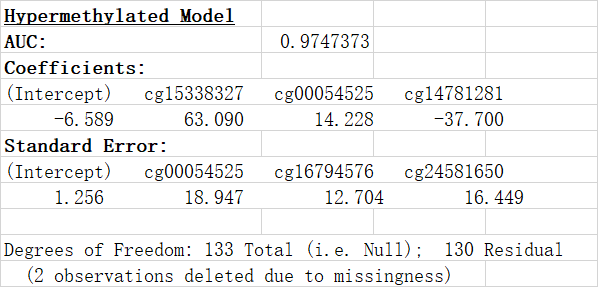

In [23]:
selected_features = ['cg00054525', 'cg16794576', 'cg24581650', 'cg15338327', 'cg00054525', 'cg14781281']
X_train_sel6 = train_data.loc[:,selected_features]
X_test_sel6 = test_data.loc[:,selected_features]

model_6features = LinearRegression()
model_6features.fit(X_train_sel6, y_train)

y_pred_sel6 = model_6features.predict(X_test_sel6)
display(y_pred_sel6)
#y_sig_pred_sel6 = 1 / (1 + np.exp(-y_pred_sel6))
#display(y_sig_pred_sel6)
threshold=0.5
y_binary_pred_sel6 = (y_pred_sel6 >= threshold).astype(int)

accuracy = accuracy_score(y_test, y_binary_pred_sel6)
print(f"Accuracy: {accuracy}")

array([-0.04649508,  0.85455621,  1.15987106,  1.18093603, -0.02634718,
        0.86709851,  1.1118853 , -0.26098252,  0.33419132,  0.59859825,
        1.03708868,  1.07635607,  0.56423832,  0.59490788,  0.85926592,
        0.65177752,  0.14450634,  0.09700539,  0.6261013 ,  0.05642196,
        0.12191626,  0.02761596,  1.11340985,  0.98062443,  0.99461053,
        0.8885094 ,  0.98254066,  1.05697041])

Accuracy: 0.9642857142857143


发现不能用sigmoid函数，一用AUC就没差别了

In [25]:
coefficients_sel6_features = model_6features.coef_
display(coefficients_sel6_features)

array([-0.21702768,  1.84432371, -0.97173111,  2.32595425, -0.21702768,
       -2.28086896])